In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt

plt.style.use("seaborn-dark-palette")

In [2]:
# Let us first setup the required equations to understand accuracy vs defense
def hitchance(a, d):
    return (1-d/a/2)*(np.heaviside(a-d,0)) + (1-np.heaviside(a-d,0))*a/d/2

def avgdamage( sbonus, crit, speed, pat, reck ):
    maxhit = np.floor(1.3 + 99/10 + sbonus/80 + 99*sbonus/640)
    minhit = reck + 0.3*pat*(speed-1)**2
    avghit = (maxhit+minhit+1)/2.0
    avgcrit = (0.05*crit*0.3)*(maxhit+1)/2.0
    return avghit + avgcrit

def acc(atk, batk):
    return atk*(64+batk)

def aBonus(x, batk, slots):
    c = slots
    amod = (99*(64+batk*(1+0.05*c)))/(99*(64+batk))
    t = 1/(amod*2)
    below = (1-np.heaviside(x-t,0))*amod
    above = np.heaviside(x-0.5,1)*( 1 - (1-x)/amod )/x
    btwn  = (1 - 1/amod/4/x)/x * (np.heaviside(x-t,1)) * (1-np.heaviside(x-0.5,1))
    return below + above + btwn

0.7297297297297297 28.369222613918264


/tmp/ipykernel_26370/707582562.py:20: RuntimeWarning: invalid value encountered in true_divide
  above = np.heaviside(x-0.5,1)*( 1 - (1-x)/amod )/x
/tmp/ipykernel_26370/707582562.py:21: RuntimeWarning: divide by zero encountered in true_divide
  btwn  = (1 - 1/amod/4/x)/x * (np.heaviside(x-t,1)) * (1-np.heaviside(x-0.5,1))
/tmp/ipykernel_26370/707582562.py:21: RuntimeWarning: invalid value encountered in multiply
  btwn  = (1 - 1/amod/4/x)/x * (np.heaviside(x-t,1)) * (1-np.heaviside(x-0.5,1))


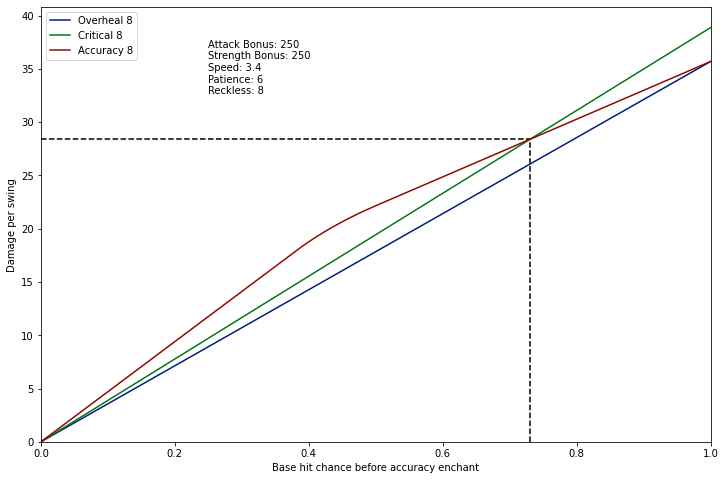

In [3]:
sbonus = 250
batk   = 250
pat    = 6
reck   = 8
speed  = 3.4
slots  = 8
# Lets say we have an x-axis which is nominal chance to hit
x = np.linspace(0, 1, 1000)
# Then our y axis is damage per second
OH = x * avgdamage(sbonus, 0, speed, pat, reck)
y = x * avgdamage(sbonus, slots, speed, pat, reck)
z = x * avgdamage(sbonus, 0, speed, pat, reck) * aBonus(x, batk, slots)
tp = x[(z>y)][-1]
cross = z[x==tp][0]
print(tp, cross)
#plt.title(f"Assume Strength: {sbonus} and Attack: {batk}")
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, OH, label="Overheal 8")
ax.plot(x, y, label="Critical 8")
ax.plot(x, z, label="Accuracy 8")
ax.set_xlim(0, 1)
ax.set_ylim(bottom=0)
ax.set_ylabel("Damage per swing")
ax.set_xlabel("Base hit chance before accuracy enchant")
ax.hlines(cross, 0, tp, linestyles='dashed', color='black')
ax.vlines(tp, 0, cross, linestyles='dashed', color='black')
ax.text(0.25, 0.8, 
         f"Attack Bonus: {batk}\nStrength Bonus: {sbonus}\nSpeed: {speed}\nPatience: {pat}\nReckless: {reck}",
         transform=ax.transAxes)
plt.legend()
plt.show()

/tmp/ipykernel_26370/606959324.py:3: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(x, OH/OH, label="Overheal 8")
/tmp/ipykernel_26370/606959324.py:4: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(x, y/OH, label="Critical 8")


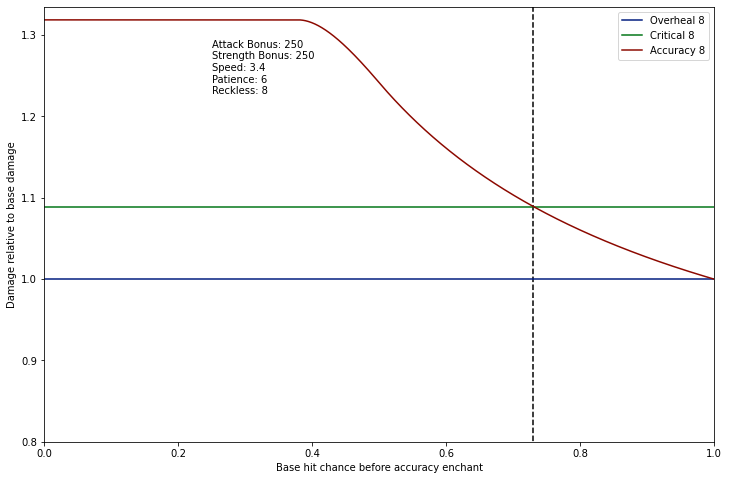

In [7]:
## Fraction above nothing
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, OH/OH, label="Overheal 8")
ax.plot(x, y/OH, label="Critical 8")
ax.plot(x, z/OH, label="Accuracy 8")
ax.set_xlim(0, 1)
ax.set_ylim(bottom=0.8)
ax.set_ylabel("Damage relative to base damageswing")
ax.set_xlabel("Base hit chance before accuracy enchant")
ax.hlines(cross, 0, tp, linestyles='dashed', color='black')
ax.vlines(tp, 0, cross, linestyles='dashed', color='black')
ax.text(0.25, 0.8, 
         f"Attack Bonus: {batk}\nStrength Bonus: {sbonus}\nSpeed: {speed}\nPatience: {pat}\nReckless: {reck}",
         transform=ax.transAxes)
plt.legend()
plt.show()
